In [5]:
#import libraries
import tmdbsimple as tmdb
from imdb import IMDb

%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [6]:
#URL for key
#https://api.themoviedb.org/3/movie/550?api_key=822771ddecfdc59a99893ffeaa1ec9b4
tmdb.API_KEY = '822771ddecfdc59a99893ffeaa1ec9b4'##'455e4535405115285f107dc76734be7e'

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/paulharris171/cs109b-Movie-Prediction-/master/movie_dataframe2.csv?token=AGPPqGcC95Duh3JxpN2H4IG_N72Cmnknks5ZAVymwA%3D%3D")

In [3]:
data.head()

,director_name,budget,genres,actor_1_name,movie_title,plot_keywords,content_rating,genre_adjusted
0,James Bobin,170000000.0,"['Adventure', 'Family', 'Fantasy']",Johnny Depp,Alice Through the Looking Glass,"['clock', 'dark fantasy', 'mad hatter', 'queen...",PG,Adventure
1,Jon M. Chu,90000000.0,"['Action', 'Adventure', 'Comedy', 'Crime', 'My...",Daniel Radcliffe,Now You See Me 2,"['card trick', 'london england', 'magician', '...",PG-13,Action
2,Michael Mann,70000000.0,"['Action', 'Crime', 'Drama', 'Mystery', 'Thril...",Chris Hemsworth,Blackhat,"['chinese', 'computer', 'cybercrime', 'hacker'...",R,Action
3,Joel Schumacher,70000000.0,"['Drama', 'Musical', 'Romance', 'Thriller']",Gerard Butler,The Phantom of the Opera,"['based on stage musical based on novel', 'dis...",PG-13,Drama
4,Peter Ramsey,145000000.0,"['Adventure', 'Animation', 'Family', 'Fantasy']",Hugh Jackman,Rise of the Guardians,"['belief', 'box office hit', 'children', 'new ...",PG,Adventure


## Messing Around

In [ ]:
#Search for The Matrix in TMDb
search = tmdb.Search()
response = search.movie(query='The Matrix')

#Initialize base structure for the posters 
base_url = "http://image.tmdb.org/t/p/w185"
matrix_poster = base_url + response['results'][0]['poster_path']
#Then write code to append the poster path to the end of base_url
print "The link for the movie poster is found below:"
matrix_poster

#import urllib
#urllib.urlretrieve(matrix, "local-filename.jpg")

# Here's the final product link  http://image.tmdb.org/t/p/w185/lZpWprJqbIFpEV5uoHfoK0KCnTW.jpg

In [7]:
this = np.array([[1,1],[1,2]])

In [23]:
search = tmdb.Search()
response = search.movie(query='The Matrix')
base_url = "http://image.tmdb.org/t/p/w185"
matrix_poster = base_url + response['results'][0]['poster_path']
#Then write code to append the poster path to the end of base_url
print "The link for the movie poster is found below:"
matrix_poster
import urllib
from PIL import Image
urllib.urlretrieve(matrix_poster, "local-filename.jpg")
one = Image.open('photos/local-filename.jpg')

The link for the movie poster is found below:


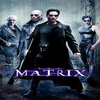

In [95]:
one2 = one.resize((100, 100), Image.ANTIALIAS)
one2

In [101]:
um = np.array(one2)

In [137]:
this = np.expand_dims(um, axis = 0)
this.shape

(1, 100, 100, 3)

In [102]:
yus = np.stack((um,um))

In [103]:
yus.shape

(2, 100, 100, 3)

In [104]:
ruh = np.concatenate((yus,yus))

In [105]:
ruh.shape

(4, 100, 100, 3)

In [106]:
np.concatenate((yus,ruh)).shape

(6, 100, 100, 3)

In [126]:
data["movie_title"][1][:-2]

'Now You See Me 2'

## Implementation

In [198]:
import time
#base url
base_url = "http://image.tmdb.org/t/p/w185"
search = tmdb.Search()
images = 0
genres = []
count = 1
k = 25
#Create for loop that cycles through dataframe.movie_title
for i in range(len(data["movie_title"])):
    ####
    #Search for movie.
    movie_title = data["movie_title"][i][:-2]
    response = search.movie(query=movie_title)
    #Create movie poster url.
    print movie_title
    if (response['total_results'] != 0):
        if (response['results'][0]['poster_path'] is not None):
            print len(response['results'][0]['poster_path'])
            poster_url = base_url + response['results'][0]['poster_path']
            #Retrieve jpg version from url.
            urllib.urlretrieve(poster_url, "photos/local-file.jpg")
            img = Image.open('photos/local-file.jpg')
            #RGBA check.
            img = img.convert('RGB')
            #Resize.
            img = img.resize((100, 100), Image.ANTIALIAS)
            img = np.array(img)
            img = np.expand_dims(img, axis = 0)
            #Add image to numpy array stack
            if(i == 0):
                images = img
            else:
                #print images.shape
                #print img.shape
                images = np.concatenate((images, img))
            
            ## add to genres
            genres = np.append(genres, data["genre_adjusted"][i])
            

    if(count == k):
        k += 25
        time.sleep(1)
        print count
    count += 1
    

Alice Through the Looking Glass
32
Now You See Me 2
32
Blackhat
32
The Phantom of the Opera
32
Rise of the Guardians
32
Ponyo
32
Cast Away
32
Blood Work
32
3000 Miles to Graceland
32
Catch Me If You Can
31
Oceans
32
The Life of David Gale
32
22 Jump Street
32
The Mortal Instruments: City of Bones
32
The Dukes of Hazzard
32
Walk the Line
32
Despicable Me 2
32
The Island of Dr. Moreau
32
The Pledge
32
Kicking & Screaming
31
The Hangover
32
At First Sight
32
Blast from the Past
32
Predator 2
32
Man of Steel
32
25
Life of Pi
32
Red Planet
32
First Blood
32
The Incredible Burt Wonderstone
32
Resident Evil: Apocalypse
32
Lolita
32
The Ghost Writer
32
Dreamcatcher
32
The Alamo
32
Once Upon a Time in America
32
Just Go with It
32
Machine Gun Preacher
32
Spirit: Stallion of the Cimarron
32
Four Christmases
32
Big Hero 6
32
The English Patient
32
Megamind
32
Surrogates
32
Valiant
32
Spy Game
32
Agora
32
Ghostbusters
32
Snakes on a Plane
32
Arachnophobia
32
London Has Fallen
32
50
Ice Age: The Me

In [179]:
#print img
#Resize.
img = Image.open('photos/local-file.jpg')
img = img.convert('RGB')
img = img.resize((100, 100), Image.ANTIALIAS)
img = np.array(img)
img = np.expand_dims(img, axis = 0)
img.shape

(1, 100, 100, 3)

In [176]:
img.shape[3] == 3

True

In [197]:
genre = []
genre = np.append(genre, data["genre_adjusted"][0])
genre = np.append(genre, data["genre_adjusted"][1])
genre = np.append(genre, data["genre_adjusted"][2])
genre

array(['Adventure', 'Action', 'Action'], 
      dtype='|S32')

In [200]:
images

array([[[[ 43,  42,  39],
         [142, 141, 139],
         [157, 156, 155],
         ..., 
         [110, 121, 121],
         [205, 227, 229],
         [164, 193, 196]],

        [[151, 150, 148],
         [125, 124, 122],
         [177, 176, 175],
         ..., 
         [ 17,  19,  23],
         [ 30,  39,  46],
         [ 90, 104, 113]],

        [[100, 100,  98],
         [ 42,  41,  39],
         [ 15,  14,  13],
         ..., 
         [ 66,  70,  73],
         [ 96,  96,  98],
         [ 50,  50,  50]],

        ..., 
        [[  4,   2,   3],
         [  2,   0,   2],
         [  2,   1,   1],
         ..., 
         [ 45,  56,  45],
         [  8,  13,   8],
         [  0,   3,   0]],

        [[  4,   2,   2],
         [  1,   0,   2],
         [  5,   4,   7],
         ..., 
         [ 46,  59,  48],
         [ 22,  31,  22],
         [  7,  10,   7]],

        [[  2,   0,   0],
         [  2,   1,   3],
         [  6,   5,   8],
         ..., 
         [ 41,  54,  42],
  

In [201]:
genres

array(['Adventure', 'Action', 'Action', ..., 'Action', 'Crime', 'Action'], 
      dtype='|S32')